

## Linear Regression with Gradient Descent

In [97]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

In [120]:
df = pd.read_csv('nyc-taxi-data.csv.bz2')
df

,07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,2013-01-01 00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,40.715008,CSH,3.50,0.50,0.50.1,0.00,0.00.1,4.50
0,22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,2013-01-01 00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,CSH,27.0,0.0,0.5,0.00,0.0,27.50
1,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.00,0.0,5.00
2,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.00,0.0,5.00
3,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.00,0.0,5.00
4,5FAA7F69213D26A42FA435CA9511A4FF,00B7691D86D96AEBD21DD9E138F90840,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.00,0.000000,0.000000,0.000000,0.000000,CRD,2.5,0.5,0.5,0.25,0.0,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,A0AFE6B722F15B7A0FDFEEA954BE316A,93D505C96BD248DC390FD47F747D762D,2013-01-01 03:44:00,2013-01-01 03:46:00,120,0.79,-73.963593,40.710941,-74.027779,40.629894,CSH,4.5,0.5,0.5,0.00,0.0,5.50
49995,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10
49996,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49997,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.00,0.0,18.50


Data Cleaning

In [124]:
#Name the columns in the data set
df.columns = ['Medallion','Hack License', 'Pickup Datetime','Dropoff Datetime', 'Travel time in seconds', 'Travel distance','Pickup Long Coordinate','Pickup Lat Coordinate',
'Dropoff Long Coordinate','Dropoff Lat Coordinate','Pay type','Fare amount','Surcharge','MTA tax','Tip', 'Tolls','Total amount']

df

,Medallion,Hack License,Pickup Datetime,Dropoff Datetime,Travel time in seconds,Travel distance,Pickup Long Coordinate,Pickup Lat Coordinate,Dropoff Long Coordinate,Dropoff Lat Coordinate,Pay type,Fare amount,Surcharge,MTA tax,Tip,Tolls,Total amount
0,22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,2013-01-01 00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,CSH,27.0,0.0,0.5,0.00,0.0,27.50
1,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.00,0.0,5.00
2,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.00,0.0,5.00
3,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.00,0.0,5.00
4,5FAA7F69213D26A42FA435CA9511A4FF,00B7691D86D96AEBD21DD9E138F90840,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.00,0.000000,0.000000,0.000000,0.000000,CRD,2.5,0.5,0.5,0.25,0.0,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,A0AFE6B722F15B7A0FDFEEA954BE316A,93D505C96BD248DC390FD47F747D762D,2013-01-01 03:44:00,2013-01-01 03:46:00,120,0.79,-73.963593,40.710941,-74.027779,40.629894,CSH,4.5,0.5,0.5,0.00,0.0,5.50
49995,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10
49996,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49997,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.00,0.0,18.50


In [125]:
#figure out both distance amount indices out of range and remove them
both_dist_amt = df[((df['Travel distance'] < 1) & ( df['Total amount'] > 20))].index
df.drop(both_dist_amt, inplace = True)
df

,Medallion,Hack License,Pickup Datetime,Dropoff Datetime,Travel time in seconds,Travel distance,Pickup Long Coordinate,Pickup Lat Coordinate,Dropoff Long Coordinate,Dropoff Lat Coordinate,Pay type,Fare amount,Surcharge,MTA tax,Tip,Tolls,Total amount
1,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.00,0.0,5.00
2,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.00,0.0,5.00
3,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.00,0.0,5.00
4,5FAA7F69213D26A42FA435CA9511A4FF,00B7691D86D96AEBD21DD9E138F90840,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.00,0.000000,0.000000,0.000000,0.000000,CRD,2.5,0.5,0.5,0.25,0.0,3.75
5,DFBFA82ECA8F7059B89C3E8B93DAA377,CF8604E72D83840FBA1978C2D2FC9CDB,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.39,-73.981544,40.781475,-73.979439,40.784386,CRD,3.0,0.5,0.5,0.70,0.0,4.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,A0AFE6B722F15B7A0FDFEEA954BE316A,93D505C96BD248DC390FD47F747D762D,2013-01-01 03:44:00,2013-01-01 03:46:00,120,0.79,-73.963593,40.710941,-74.027779,40.629894,CSH,4.5,0.5,0.5,0.00,0.0,5.50
49995,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10
49996,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49997,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.00,0.0,18.50


In [132]:
#Removed the lower and upper 10% of the data because those values are extremely high and extremely low and would skew the data se

q_low = df["Travel time in seconds"].quantile(0.1)
q_hi  = df["Travel time in seconds"].quantile(0.9)

df_filtered = df[(df["Travel time in seconds"] > q_hi) & (df["Travel time in seconds"] < q_low)].index
df.drop(df_filtered, inplace = True)
df

,Medallion,Hack License,Pickup Datetime,Dropoff Datetime,Travel time in seconds,Travel distance,Pickup Long Coordinate,Pickup Lat Coordinate,Dropoff Long Coordinate,Dropoff Lat Coordinate,Pay type,Fare amount,Surcharge,MTA tax,Tip,Tolls,Total amount
1,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.00,0.0,5.00
2,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.00,0.0,5.00
3,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.00,0.0,5.00
4,5FAA7F69213D26A42FA435CA9511A4FF,00B7691D86D96AEBD21DD9E138F90840,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.00,0.000000,0.000000,0.000000,0.000000,CRD,2.5,0.5,0.5,0.25,0.0,3.75
5,DFBFA82ECA8F7059B89C3E8B93DAA377,CF8604E72D83840FBA1978C2D2FC9CDB,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.39,-73.981544,40.781475,-73.979439,40.784386,CRD,3.0,0.5,0.5,0.70,0.0,4.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,A0AFE6B722F15B7A0FDFEEA954BE316A,93D505C96BD248DC390FD47F747D762D,2013-01-01 03:44:00,2013-01-01 03:46:00,120,0.79,-73.963593,40.710941,-74.027779,40.629894,CSH,4.5,0.5,0.5,0.00,0.0,5.50
49995,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10
49996,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49997,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.00,0.0,18.50


In [133]:
#dropped the travel distances of 0, because the travelling had not taken place in that instance

trav_dist_zero = df[((df['Travel distance'] == 0))].index
df.drop(trav_dist_zero, inplace = True)
df

,Medallion,Hack License,Pickup Datetime,Dropoff Datetime,Travel time in seconds,Travel distance,Pickup Long Coordinate,Pickup Lat Coordinate,Dropoff Long Coordinate,Dropoff Lat Coordinate,Pay type,Fare amount,Surcharge,MTA tax,Tip,Tolls,Total amount
1,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.00,0.0,5.00
2,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.00,0.0,5.00
3,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.00,0.0,5.00
5,DFBFA82ECA8F7059B89C3E8B93DAA377,CF8604E72D83840FBA1978C2D2FC9CDB,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.39,-73.981544,40.781475,-73.979439,40.784386,CRD,3.0,0.5,0.5,0.70,0.0,4.70
7,468244D1361B8A3EB8D206CC394BC9E9,BB899DFEA9CC964B50C540A1D685CCFB,2013-01-01 00:00:00,2013-01-01 00:04:00,240,1.71,-73.955383,40.779728,-73.967758,40.760326,CSH,6.5,0.5,0.5,0.00,0.0,7.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,A0AFE6B722F15B7A0FDFEEA954BE316A,93D505C96BD248DC390FD47F747D762D,2013-01-01 03:44:00,2013-01-01 03:46:00,120,0.79,-73.963593,40.710941,-74.027779,40.629894,CSH,4.5,0.5,0.5,0.00,0.0,5.50
49995,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10
49996,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49997,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.00,0.0,18.50


Correlations between trip distance, travel time and fare amount and visualizations of the correlations in form of Scatterplot matrix. 


Travel Distance and Travel time in seconds correlation: 0.7750195467718786
Travel Distance and Fare amount correlation: 0.9385164942443723
Travel time in seconds and Fare amount correlation: 0.8475807842992701


array([[<AxesSubplot:xlabel='Travel distance', ylabel='Travel distance'>,
        <AxesSubplot:xlabel='Travel time in seconds', ylabel='Travel distance'>,
        <AxesSubplot:xlabel='Fare amount', ylabel='Travel distance'>],
       [<AxesSubplot:xlabel='Travel distance', ylabel='Travel time in seconds'>,
        <AxesSubplot:xlabel='Travel time in seconds', ylabel='Travel time in seconds'>,
        <AxesSubplot:xlabel='Fare amount', ylabel='Travel time in seconds'>],
       [<AxesSubplot:xlabel='Travel distance', ylabel='Fare amount'>,
        <AxesSubplot:xlabel='Travel time in seconds', ylabel='Fare amount'>,
        <AxesSubplot:xlabel='Fare amount', ylabel='Fare amount'>]],
      dtype=object)

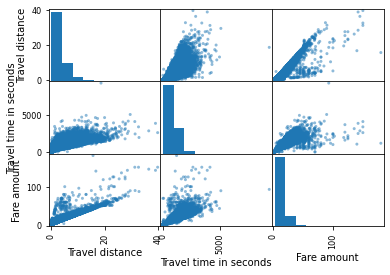

In [134]:


from pandas.plotting import *

#set the columns to the desired columns from the dataframe
column_1 = df["Travel distance"]
column_2 = df["Travel time in seconds"]
column_3 = df['Fare amount']

#find the correlations
correlation_pair1 = column_1.corr(column_2)
correlation_pair2 = column_1.corr(column_3)
correlation_pair3 = column_2.corr(column_3)

#display results
print('Travel Distance and Travel time in seconds correlation:',correlation_pair1)
print('Travel Distance and Fare amount correlation:',correlation_pair2)
print('Travel time in seconds and Fare amount correlation:',correlation_pair3)

#create a subset for plotting
Subset = df[['Travel distance', 'Travel time in seconds', 'Fare amount']]

#create a scatter matrix
pd.plotting.scatter_matrix(Subset)

#The correlations between the travel distance and travel time is a moderately strong positive correlation. The points are clusterd then diffuse outward as x and y increase.
#The correlation between travel distance and fare amount is a very strong positive correlation. The points seem linear for the most of the distribution and are spread at a constant distance as x and y increase.
#The correlation between travel time in seconds and fare amount is a strong positive correlation.The points are lightly clustered when x is closer to 0-2000 but diffuse out further as x and y increase. 


Find a simple line to our data (distance, money)using trip distance, and fare amount.



In [70]:
from sklearn.linear_model import *

#get both the travel distance and fare amount in a dataframe 
travel_dist = pd.DataFrame(df['Travel distance'])
fare_amt = pd.DataFrame(df['Fare amount'])

#find the fitness
regression = LinearRegression().fit(travel_dist,fare_amt)

#display the coefficient of regression and intercept
print(regression.coef_)
print(regression.intercept_)

#equation: y = 2.8124x+3.7234
# y = fare amount
# x = travel distance


[[2.81242775]]
[3.72339997]
The fare amount for a 3 mile trip is $[[12.16068321]] according to this model.



Fit a Multiple Linear Regression hyperplane into this data.

In [135]:

from sklearn.linear_model import *

#set the subset to 2 explanatory variables
subset_1 = df[['Travel distance','Travel time in seconds']]

#create dataframe for explanatory vars
travel_dist_time = pd.DataFrame(subset_1)

#create dataframe for dependet var
total_amt = pd.DataFrame(df['Total amount'])

#find fitness
regression = LinearRegression().fit(travel_dist_time,total_amt)

#display coefficients and intercepts
print(regression.coef_)
print(regression.intercept_)

#equation : y = 2.445x + 0.005z + 3.0758
# x = travel distance
# z = travel time in seconds
# y = total amount


[[2.44462193 0.00546607]]
[3.07582458]
This model predicts that the 3 mile 6 min trip will be $[[10.44248676]]


## Gradient Descent
Implement the gradient descent optimization to find the optimal parameters for our Simple Linear Regression model of task 3.

Iteration number = 0  m = 0.03115801001131333  b = 0.006343616941756399  Cost = 234.59565951837408
Iteration number = 5  m = 0.1827189995110155  b = 0.037292606791839544  Cost = 215.184439431378
Iteration number = 10  m = 0.3274638362979046  b = 0.06700189377974454  Cost = 197.4726155389908
Iteration number = 15  m = 0.46569789542152995  b = 0.09552685471489424  Cost = 181.31134269268856
Iteration number = 20  m = 0.5977128718763879  b = 0.12292038583847106  Cost = 166.5648128026585
Iteration number = 25  m = 0.7237873934335554  b = 0.1492330139463657  Cost = 153.10911294670345
Iteration number = 30  m = 0.8441876060190295  b = 0.17451300253410199  Cost = 140.83118349523767
Iteration number = 35  m = 0.9591677328686061  b = 0.19880645318673978  Cost = 129.62786749209772
Iteration number = 40  m = 1.0689706086340551  b = 0.22215740242676857  Cost = 119.40504329831067
Iteration number = 45  m = 1.1738281895626834  b = 0.2446079142234624  Cost = 110.07683320589776
Iteration number = 50  m

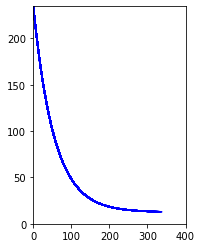

In [141]:
#set the travel distance and fare to sets
dist = df['Travel distance']
fare = df['Fare amount']

#plot the figure
fig = plt.figure()

#create a subplot
optimization = plt.subplot(1, 2, 2)

#set initial values to 0 for coefficient and intercept
m_cur = 0
b_cur = 0

#set the iterations, learning rate, and number of distance units
n = float(len(dist))
learningRate = 0.0005
num_iterations = 400

#set precision level
precision = 0.01

#initialize the old cost
oldcost = 0

#create 2 arrays of distance and cost history
distance, costHist = [], []

#predict the fare using the distance, intercept, and coeff
fare_predic = m_cur*dist + b_cur

#calculate initial cost
initCost = (1/n)*sum((fare_predic - fare)**2)

#optimize the x and y limits
optimization.set_xlim(left = 0, right = num_iterations)
optimization.set_ylim(bottom = 0, top = initCost)

#iterate 400 times
for i in range(num_iterations):
    
    #predict the fare
    fare_predic = m_cur*dist + b_cur
    
    #find the cost
    cost = (1/n)*sum((fare_predic - fare)**2)
    
    #diminish the intercept and coeff
    m_gradient = (1.0/n) * sum(dist*(fare_predic - fare))
    b_gradient = (1.0/n) * sum(fare_predic - fare)
    
    m_cur = m_cur - learningRate * m_gradient
    b_cur = b_cur - learningRate * b_gradient
    
    if abs(cost - oldcost) <= precision:
        print("Stopped at ", i)
        break
    oldcost = cost
    
    #graph the costs by appending the distance and cost lists with the appropriate values
    distance.append(i)
    costHist.append(cost)
    optimization.plot(distance, costHist, color = 'blue')
    
    #display the graph
    fig.canvas.draw()
    
    #count by 5
    if(i%5 == 0):
        print("Iteration number =", i, " m =", m_cur, ' b =', b_cur, ' Cost =', cost)

#print out the intercept and coefficient after 400 iterations
print('Intercept', b_cur,'Coefficient', m_cur)
